# Import necessary libraries

In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [31]:
# Load the data
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Step 1: Dataset Exploration


In [32]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:\n", data.head())


First 5 rows of the dataset:
    id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN            

In [33]:
# Check the shape of the dataset
print("\nShape of the dataset:", data.shape)



Shape of the dataset: (140700, 20)


In [34]:
# Check the data types of each column
print("\nData Types:\n", data.dtypes)



Data Types:
 id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype:

In [35]:
# Check for unique values in each categorical column
categorical_columns = ['Gender', 'City', 'Working Professional or Student', 'Profession', 
                       'Sleep Duration', 'Dietary Habits', 'Degree', 
                       'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for col in categorical_columns:
    print(f"\nUnique values in {col}:", data[col].unique())


Unique values in Gender: ['Female' 'Male']

Unique values in City: ['Ludhiana' 'Varanasi' 'Visakhapatnam' 'Mumbai' 'Kanpur' 'Ahmedabad'
 'Thane' 'Nashik' 'Bangalore' 'Patna' 'Rajkot' 'Jaipur' 'Pune' 'Lucknow'
 'Meerut' 'Agra' 'Surat' 'Faridabad' 'Hyderabad' 'Srinagar' 'Ghaziabad'
 'Kolkata' 'Chennai' 'Kalyan' 'Nagpur' 'Vadodara' 'Vasai-Virar' 'Delhi'
 'Bhopal' 'Indore' 'Ishanabad' 'Vidhi' 'Ayush' 'Gurgaon' 'Krishna'
 'Aishwarya' 'Keshav' 'Harsha' 'Nalini' 'Aditya' 'Malyansh' 'Raghavendra'
 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'Nandini' 'M.Com' 'Plata'
 'Atharv' 'Pratyush' 'City' '3.0' 'Less than 5 Kalyan' 'MCA' 'Mira'
 'Moreadhyay' 'Morena' 'Ishkarsh' 'Kashk' 'Mihir' 'Vidya' 'Tolkata' 'Anvi'
 'Krinda' 'Ayansh' 'Shrey' 'Ivaan' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kashish' 'Kibara' 'Vaishnavi' 'Chhavi' 'Parth' 'Mahi' 'Tushar' 'MSc'
 'No' 'Rashi' 'ME' 'Molkata' 'Researcher' 'Kagan' 'Armaan' 'Ithal'
 'Nalyan' 'Dhruv' 'Galesabad' 'Itheg' 'Aaradhya' 'Pooja' 'Khushi'
 'Khaziabad' 'Jhanvi

In [36]:
# Check the distribution of the target variable
print("\nDistribution of the target variable (Depression):\n", data['Depression'].value_counts())



Distribution of the target variable (Depression):
 Depression
0    115133
1     25567
Name: count, dtype: int64


# Step 2: Exploratory Data Analysis (EDA)

In [37]:
# Summary Statistics
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
                   id            Age  Academic Pressure  Work Pressure  \
count  140700.000000  140700.000000       27897.000000  112782.000000   
mean    70349.500000      40.388621           3.142273       2.998998   
std     40616.735775      12.384099           1.380457       1.405771   
min         0.000000      18.000000           1.000000       1.000000   
25%     35174.750000      29.000000           2.000000       2.000000   
50%     70349.500000      42.000000           3.000000       3.000000   
75%    105524.250000      51.000000           4.000000       4.000000   
max    140699.000000      60.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27898.000000        27897.000000     112790.000000     140700.000000   
mean       7.658636            2.944940          2.974404          6.252679   
std        1.464466            1.360197          1.416078          3.853615   
min 

In [38]:
# Check for Missing Values
print("\nMissing Values:\n", data.isnull().sum())



Missing Values:
 id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


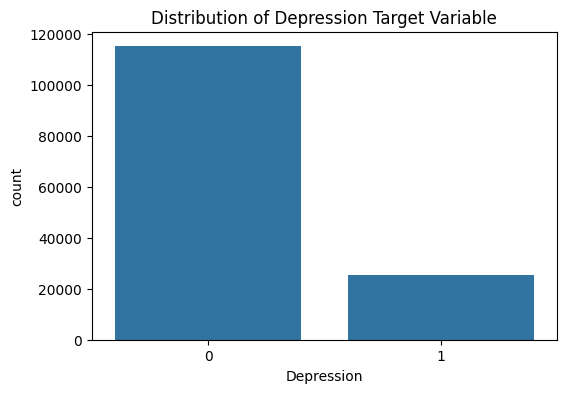

In [39]:
# Distribution of the Target Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Depression', data=data)
plt.title('Distribution of Depression Target Variable')
plt.show()

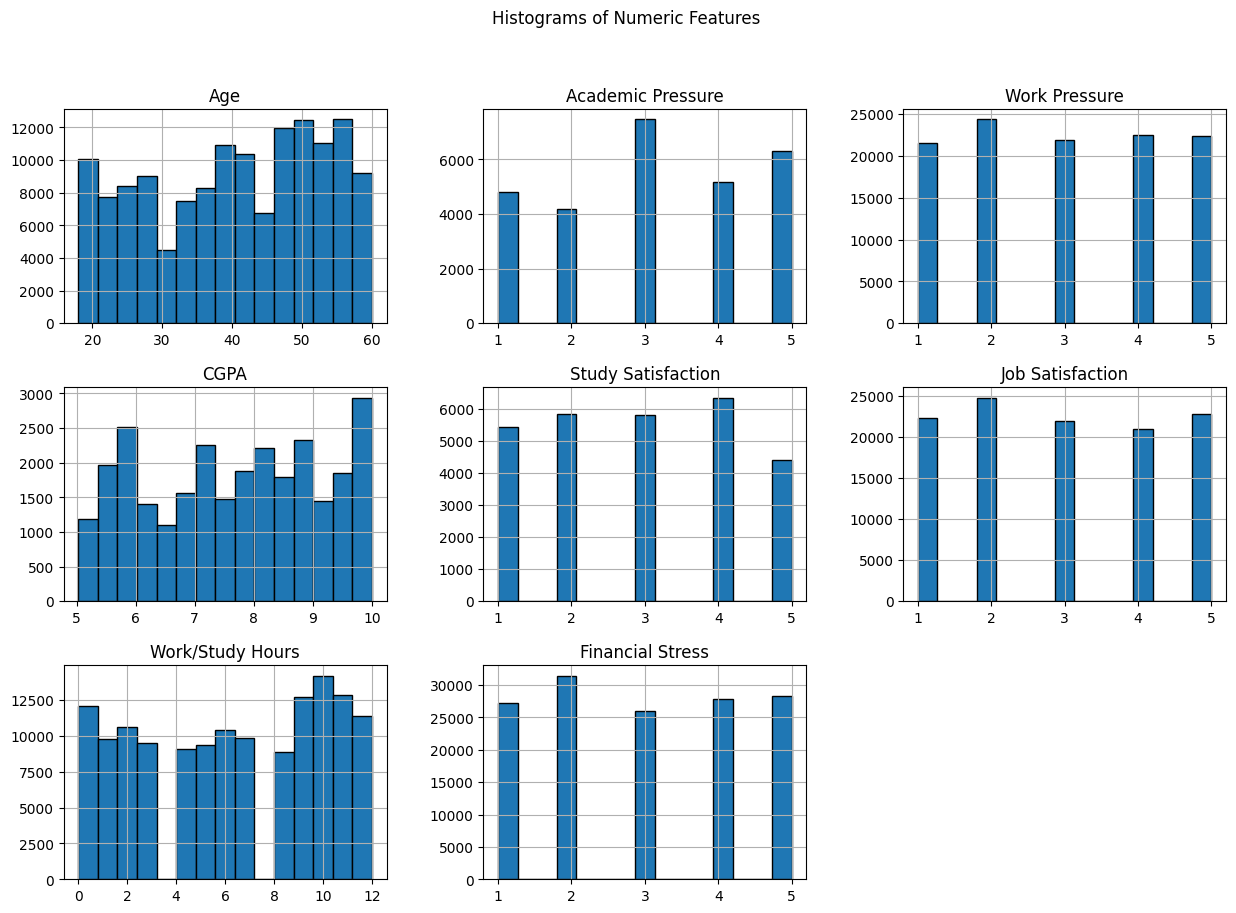

In [40]:
# Distribution of Numerical Features
numeric_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                   'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
data[numeric_columns].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.show()

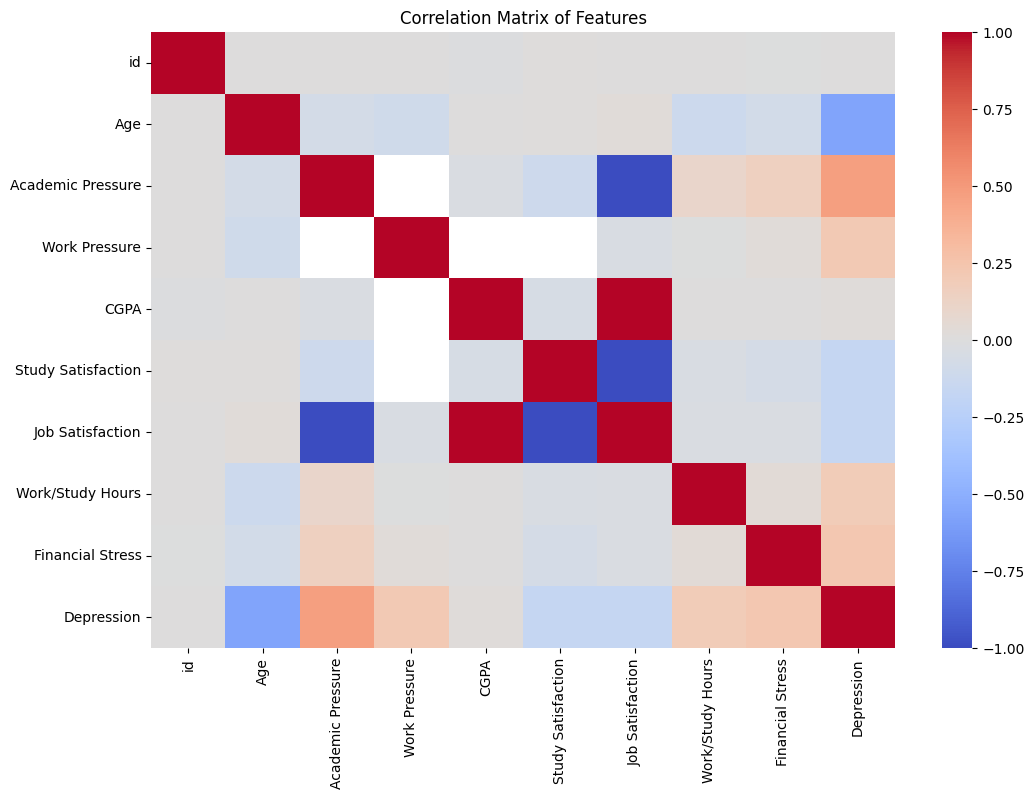

In [41]:
# Correlation Matrix

# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

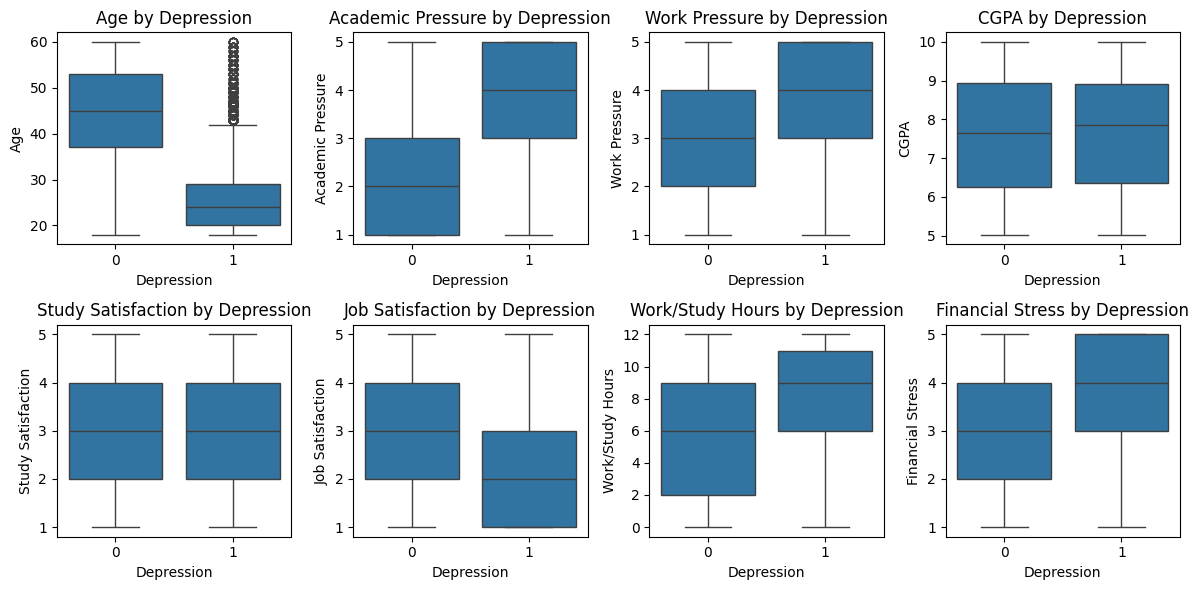

In [42]:
# Boxplots to Analyze the Distribution of Features by Target
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Depression', y=column, data=data)
    plt.title(f'{column} by Depression')
plt.tight_layout()
plt.show()

# Step 3: Data Preprocessing


In [43]:
# Save the 'id' column from the test data for the submission file
test_ids = test_data['id']

In [44]:
# Drop unnecessary non-numeric columns
data = data.drop(columns=['Name', 'id'])
test_data = test_data.drop(columns=['Name', 'id'])

In [45]:
# Combine training and test data to ensure consistent encoding
combined_data = pd.concat([data, test_data], axis=0)

In [46]:
# Handle Missing Values
numeric_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 
                   'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
imputer = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])
test_data[numeric_columns] = imputer.transform(test_data[numeric_columns])

In [47]:
# Encode Categorical Variables
label_encoder = LabelEncoder()
binary_columns = ['Gender', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [48]:
# Fit LabelEncoder on unique values across both datasets and transform
for col in binary_columns:
    unique_values = pd.concat([combined_data[col]]).unique()
    label_encoder.fit(unique_values)
    data[col] = label_encoder.transform(data[col])
    test_data[col] = label_encoder.transform(test_data[col])


In [49]:
# One-Hot Encoding for multi-class categorical variables
categorical_columns = ['City', 'Working Professional or Student', 'Profession', 
                       'Sleep Duration', 'Dietary Habits', 'Degree']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

In [50]:
# Align columns of test data with training data
missing_cols = set(data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[data.columns.drop('Depression')]

/var/folders/b7/93h4cjvs16jd2n6rklkj7rw00000gn/T/ipykernel_18766/1214602833.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data[col] = 0
/var/folders/b7/93h4cjvs16jd2n6rklkj7rw00000gn/T/ipykernel_18766/1214602833.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_data[col] = 0
/var/folders/b7/93h4cjvs16jd2n6rklkj7rw00000gn/T/ipykernel_18766/1214602833.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

In [51]:
# Ensure all columns in both datasets are of numeric types
data = data.apply(pd.to_numeric)
test_data = test_data.apply(pd.to_numeric)

In [52]:
# Ensure all features are numeric
assert data.select_dtypes(include=['object']).empty, "There are still non-numeric columns in data"
assert test_data.select_dtypes(include=['object']).empty, "There are still non-numeric columns in test_data"


# Step 4: Split the Data

In [53]:
X = data.drop(columns=['Depression'])
y = data['Depression']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Hyperparameter Tuning with GridSearchCV


In [ ]:
# Define the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7, 9],  # Maximum depth of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'subsample': [0.6, 0.7, 0.8, 0.9],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9]  # Subsample ratio of columns when constructing each tree
}


In [55]:
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                            scoring='accuracy', cv=3, verbose=2, n_jobs=-1)



In [56]:
# Fit the model with GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   6.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   5.8s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   6.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   6.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   6.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   6.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   6.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   6.5s
[CV] END

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=2)

In [57]:
# Get the best model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:\n", grid_search.best_params_)

Best Hyperparameters:
 {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.7}


# Step 6: Model Evaluation


In [58]:
y_pred = best_model.predict(X_val)


In [59]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.9389481165600568

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.84      0.82      0.83      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.90     28140
weighted avg       0.94      0.94      0.94     28140



# Step 7: Making Predictions on Data

In [60]:
# Make predictions on the test data
test_predictions = best_model.predict(test_data)

# Prepare the Submission File

In [61]:
submission = pd.DataFrame({
    'id': test_ids,  # Using index as 'id' since the original 'id' was dropped
    'Depression': test_predictions
})

In [62]:
# Save the submission file
submission.to_csv('submission2.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv
